## Cp1: 딥러닝을 이용한 피부암 진단 원격 의료 서비스(데이터 분석 관점)

이번 분석을 통해서 피부암 환자는 꾸준히 증가 추세를 보이고 있으며 남/여를 구분해서 확인하였을 때, 여자, 50세 이상의 고령 환자의 비율이 높았음을 시각적으로 확인할 수 있었습니다. 또한, 고령인구와 전국 병원분포 낮은 순위로 확인해 보았을 때, 경상북도, 전라북도, 전라남도를 꼽을 수 있었습니다. 현재 시중에 사용되고 있는 비대면 앱 서비스 중 긍정 평가와 부정 평가로 나뉘어 확인할 수 있었는데 지방의 경우에는 연결된 병원이 없으며, 비대면 진료를 신청했음에도 불구하고 병원에서는 내원하길 원하여 거주지역 외의 타지역 병원과 연결되어 내원이 불편한 경험을 공유받았습니다.

-> 본 분석을 통해 피부암 환자의 동향을 시각적으로 확인할 수 있었고, 현재 시중에 사용되고 있는 비대면 앱 서비스에서의 평가를 확인할 수 있었다. 또한, 웹 앱서비스시 지역의 대형병원 - 거주지의 어플리케이션이 아닌 지역병원-거주지로의 확대시 거주지 근처의 병원의 수를 확인하는 추가적 분석이 필요가 있다.


----


비대면 진료 서비스를 제공하고 있는 어플리케이션 리뷰분석을 통하여 토픽분석을 진행


-토픽분석을 통하여 얻고자 하는 것?

비대면 진료 서비스를 제공하고 있는 어플리케이션의 사용자 의견을 이해하고 주제에 대한 트렌드를 발견하기 위함



----
데이터셋

appstore_1550889868 - 메디팡팡

appstore_1621486623 - 모비닥

appstore_1495296101 - 엠디톡

appstore_517637141 - 굿닥

appstore_1538105223 - 올라케어

appstore_1584940053- 나만의 닥터

appstore_1565924524 - 닥터온

appstore_1014889755 - 똑닥

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# Colab에 Mecab 설치
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd
메디팡팡 = pd.read_csv('/content/appstore_1550889868.csv')
모비닥 = pd.read_csv('/content/appstore_1621486623.csv')
엠디톡 =pd.read_csv('/content/appstore_1495296101.csv')
굿닥= pd.read_csv('/content/appstore_517637141.csv')
올라케어=pd.read_csv('/content/appstore_1538105223.csv')
나만의닥터=pd.read_csv('/content/appstore_1584940053.csv')
닥터온=pd.read_csv('/content/appstore_1565924524.csv')
똑닥= pd.read_csv('/content/appstore_1014889755.csv')


#전체 리뷰 개수 출력
print('메디팡팡 전체 리뷰 개수 :',len(메디팡팡))
print('모비닥 전체 리뷰 개수 :',len(모비닥))
print('엠디톡 전체 리뷰 개수:', len(엠디톡))
print('굿닥 전체 리뷰 개수:', len(굿닥))
print('올라케어 전체 리뷰 개수:', len(올라케어))
print('나만의닥터 전체 리뷰 개수:', len(나만의닥터))
print('닥터온 전체 리뷰 개수:', len(닥터온))
print('똑닥 전체 리뷰 개수:', len(똑닥))

메디팡팡 전체 리뷰 개수 : 500
모비닥 전체 리뷰 개수 : 60
엠디톡 전체 리뷰 개수: 12
굿닥 전체 리뷰 개수: 500
올라케어 전체 리뷰 개수: 500
나만의닥터 전체 리뷰 개수: 500
닥터온 전체 리뷰 개수: 7
똑닥 전체 리뷰 개수: 500


리뷰의 개수를 확인해봤을때, 리뷰개수가 너무 작아서 8개의 데이터를 하나의 테이블로 합쳐주었다.

In [ ]:
# 하나의 테이블로 합쳐줌
result = pd.concat([메디팡팡, 모비닥, 엠디톡, 굿닥, 올라케어, 나만의닥터, 닥터온, 똑닥])

# 날짜 및 시간 열을 datetime 형식으로 변환
result['DATE'] = pd.to_datetime(result['DATE'])

# 원하는 형식으로 포맷팅하는 함수 정의
def format_date(dt):
    return dt.strftime("%Y-%m-%d")

# apply 함수를 사용하여 포맷팅 적용
result['Formatted_Date'] = result['DATE'].apply(format_date)

In [ ]:
result['Formatted_Date'] = pd.to_datetime(result['Formatted_Date'], errors='coerce')

In [ ]:
#결측치 확인
result.isnull().sum()

USER              0
DATE              0
STAR              0
LIKE              0
TITLE             0
REVIEW            0
Formatted_Date    0
dtype: int64

In [ ]:
#데이터 정보 확인
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype                                 
---  ------          --------------  -----                                 
 0   USER            2579 non-null   object                                
 1   DATE            2579 non-null   datetime64[ns, pytz.FixedOffset(-420)]
 2   STAR            2579 non-null   int64                                 
 3   LIKE            2579 non-null   int64                                 
 4   TITLE           2579 non-null   object                                
 5   REVIEW          2579 non-null   object                                
 6   Formatted_Date  2579 non-null   datetime64[ns]                        
dtypes: datetime64[ns, pytz.FixedOffset(-420)](1), datetime64[ns](1), int64(2), object(3)
memory usage: 161.2+ KB


In [ ]:
# 데이터셋에서 가장 오래된 날짜
print('가장 오래된 날짜',result['Formatted_Date'].min())
# 데이터셋에서 가장 최근 날짜
print('가장 최근 날짜',result['Formatted_Date'].max())

가장 오래된 날짜 2020-03-31 00:00:00
가장 최근 날짜 2023-09-18 00:00:00


In [ ]:
# 별점 3점이상의 리뷰를 긍정리뷰로 만들어주기
result['label'] = np.select([result.STAR > 3], [1], default=0)

In [ ]:
# 데이터셋
result= result.drop(['USER', 'LIKE','DATE'], axis=1)
result

,STAR,TITLE,REVIEW,Formatted_Date,label
0,5,앱 메모장 만들어 주세요,진료기록 볼 수 있어서 너무 좋아요. 따로 관리할 필요 없이 건보랑 연결되어서 편하...,2022-01-16,1
1,5,좋습니다!,진작에 알았다면 좋았을 것을 ㅠㅠ,2021-12-17,1
2,5,마이데이타를 이용한 서비스 메디팡팡!!!!,금융권에서만 사용하는 기술인 줄 알았던 \n마이데이타를 이용해 의료기록을 보여주니 ...,2021-12-17,1
3,5,좋아요,괜찮은 앱같아요,2021-12-17,1
4,5,사용하기 편하네요:),처음 써봤는데 사용하기 편해서 자주 이용할것 같습니다~,2021-12-17,1
...,...,...,...,...,...
495,5,편해요,대기 시간도 적고 우선 개인정보를 매번 안적어도 되어서 너무 좋아요,2022-08-16,1
496,5,아즈아주좋음,뚜벅이인 저는 매우 유용하게 잘쓰고있음 현장접수의 치열함을 빠져나와 미리 시간되면 ...,2022-08-16,1
497,5,좋아요,너무 좋아요,2022-08-13,1
498,5,짱 편함,짱 편함,2022-08-10,1


In [ ]:
result['label'].value_counts()

1    2077
0     502
Name: label, dtype: int64

REVIEW에 대한 분석

라벨이 1일때, 텍스트분석

라벨이 0일때, 텍스트분석

----

가설A. 2020년에 앱 사용 리뷰가 많았을 것이다.

가설B. 12월에 앱 사용 리뷰가 많았을 것이다.

가설C. 불만 리뷰를 남기는 사람들은 리뷰를 길게 쓸 것이다.

In [ ]:
# 리뷰분석을 위하여 라벨별로 데이터셋 분리
result0= result[result['label'] == 0 ]
result1= result[result['label'] == 1 ]

In [ ]:
from konlpy.tag import Okt
import re

In [ ]:
# KoNLPy의 Okt 형태소 분석기 사용
okt = Okt()

# 불용어 리스트
stopwords = ['을', '를', '이', '가', '은', '는', '들', '고', '하다', '였어요', '있어요','굿닥','올라케어', '메디팡팡', '모비딕', '엠디톡','나만의 닥터',
'닥터온', '똑닥']

# 전처리 함수 정의
def preprocess(review):
    # 한글과 공백을 제외한 모든 문자 제거
    review = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", review)

    # 형태소 분석을 통해 명사만 추출
    nouns = okt.nouns(review)

    # 불용어 제거
    nouns = [word for word in nouns if word not in stopwords]

    # 전처리된 문장 반환
    return ' '.join(nouns)

# 전처리된 리뷰를 저장할 리스트
cleaned_reviews0 = []

# 부정 리뷰에 대해 전처리 수행
for review in result0['REVIEW']:
    cleaned_review0 = preprocess(review)
    cleaned_reviews0.append(cleaned_review0)

print(cleaned_reviews0)

['더 병원 참여 예약', '정기 내과 소아 청소년 가정의학 등 비대 진료 시도 국 의료 규제 격진 료 대해 좀더 완화 앱 참여 의료 기관 더 건강 기록 처방 기록 기능 참여 의료 기관 별로', '평소 앱 잘만 앱 애플 계정 카카오 계정', '병원 거의 아예 비대 진료 해외 거주 자도 해외 기준 위치 때문 병원 하나 개발 용 테스트 병원 사용 대리인 인증 앱 프로필 화면 인증 대기 거 값 동기화', '병원 가기 제 족족 방 하라 엠디 톡 전화 해도 그게 뭐 설명 시간', '다운 회원 가입 후 로그인 하니 갑자기 앱 튕기더 그때 앱 것 완전 먹통 이건 뭔가 해결 책좀', '어플 다운 회원 가입 완료 로그인 어플 계속 계속', '최신 버전 계속 튕겨', '친구 이야기 혹시 정말 의사 선생님 진단 체크 관련 처방 거리 고민 약 바로 처방 요다음 또 이용 생각 분야 선생님 상담', '어플 업데이트 하라 앱스토어 최신 앱 사용', '입력 시간 명 다운 코드 입력 거 문제', '약국 조제 접수 어플 분 조제 진행 수가 약국 전화 통 하규 약 조제 신청 이전 제약 배송 지금 줄 알 이용 직접 조제 가야 거 최소한 안내 해 직접 가야 거 굳이 이용 이유', '진료 병원 온 카톡 앱 기자 현황 볼 수 몽땅 헛소리 임 대기 병원 검색 아무 현황 접수 방 병원 접수 그냥 병원 광고 앱 병원 사람 심기 수가 사람 상대로 낚시질 악성 앱 표현 수가', '그냥 다운로드 수 급 최악 어플', '병원 선택 때 도화면 버벅거려 병원 선택', '마케팅 거부 투표 이벤트 알림 자꾸 쉬 알림 앱 자체 거부 기능 알림 안 폰 알림 해제 하라 개선', '치매 약 탈모 약 잘못 포장 건 일이 알림 긴급 당신 처방 약 치매 약 조금 과장 낚시 알림 생각 저 설치 이용 적 저런 알림 가슴 철렁 사실 건 사실 별개 마치 제 처방 약 잘못 것 클릭 유도 알림 의료 서비스 제공 앱 적절 치 것', '앞 광고 표시 긴급 표시 팝업 알림 왜 알림 센터 보고 어이 뭔가 그냥 앱 접속 낚시 광고 앱', '요긴 앱 아

In [ ]:
data0 = {'전처리된 리뷰': cleaned_reviews0}
df0 = pd.DataFrame(data0)

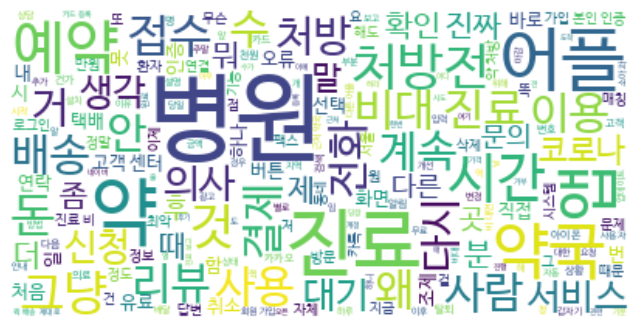

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cleaned_texts = df0['전처리된 리뷰'].tolist()

# 전처리된 텍스트 데이터를 하나의 문자열로 합치기
text_combined = ' '.join(cleaned_texts)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white').generate(text_combined)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# KoNLPy의 Okt 형태소 분석기 사용
okt = Okt()

# 불용어 리스트
stopwords = ['을', '를', '이', '가', '은', '는', '들', '고', '하다', '였어요', '있어요','굿닥','올라케어', '메디팡팡', '모비딕', '엠디톡','나만의 닥터',
'닥터온', '똑닥']

# 전처리 함수 정의
def preprocess(review):
    # 한글과 공백을 제외한 모든 문자 제거
    review = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", review)

    # 형태소 분석을 통해 명사만 추출
    nouns = okt.nouns(review)

    # 불용어 제거
    nouns = [word for word in nouns if word not in stopwords]

    # 전처리된 문장 반환
    return ' '.join(nouns)

# 전처리된 리뷰를 저장할 리스트
cleaned_reviews1 = []

# 긍정 리뷰에 대해 전처리 수행
for review in result1['REVIEW']:
    cleaned_review1 = preprocess(review)
    cleaned_reviews1.append(cleaned_review1)

print(cleaned_reviews1)

['진료기록 볼 수 관리 필요 건 보랑 연결 진료 상세 역 알 수 해당 진료 기록 개인 진료 적 수 메모장 활성화 더 거 개발자 부분 고려', '진작 것', '금융 사용 기술 줄 마이 데이타 이용 의료 기록 사용 수 듯 코로나 시대 걸 비대 진료 서비스 위치 기반 이용 주변 병 의원 겸색 가족 인증 통해 가족 보험 청구 서비스 미성년 자녀', '앱', '처음 사용 자주 이용', '사용 수', '내 약 복용 연동 다시 볼 수 장점 생각 예전 생각 못 비 대면 진료 보고 약 처방 수 게 시국 어플 것 직장인 차안 병원 진료 보기 이제야 이해 어플 다행 세상', '요즘 시대 비대 진료 최고 코로나 사실 앱', '앞 이용', '애용', '병원 풀 대해 좀더 향후 확장 한번 기록 관리 수 통합 관리 차원 그 취지 어플 생각 함', '진료 볼때 시간 사람과 접촉 걱정 비 대면 진행', '비 대면 진료기록', '코로나 시국 덕 어플 개발', '내 건강 진료 또 비대 서비스 더욱 믿음', '코로나 시대 병원 마냥 앱', '시간 일해 병원 때 곳 것', '건강 상식 비대 진료', '의료 정보 한번 볼 수 것', '', '한번 의료 관리 비대 진료', '사용 주변 사용', '병원 안 순 꼭 서비스 앱 것', '컬 데이터 한눈', '정보 알', '비대 진료 예약 악 오 개킹 요즘 시국 거만 앱 듯', '한눈', '거', '보기 이용', '내 약 저장', '', '앱 자주', '건강 관련 앱', '앞 더 욥', '요즘 시국 병원 일도 서류 거 일일 병원 발급 필요 앱 하나로 해결 건강 기록 볼 수 의사 선생님 제 상태 더 설명 수 강추', '기존 어플 건강 관리 수 정말 어플', '앱 미리 더 요사', '핑계 건강 기록 서비스 거', '', '어플', '요즘 병원 가기 비 대면 진료 수', '병원 여러 군데 매번 자료 요청 번 볼 수 어플 세상 앞 더 병원', '매우 것', '비대 진료 더욱 확대', '코로나 시대 비대 진료 게다가 내 진료 기록 번 볼 수', '요즘 코로나 때문 

In [ ]:
data1 = {'전처리된 리뷰': cleaned_reviews1}
df1 = pd.DataFrame(data1)

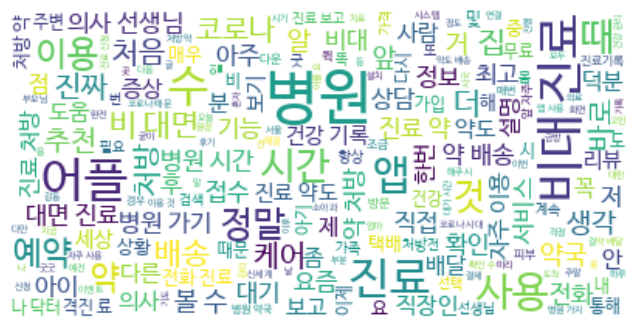

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cleaned_texts = df1['전처리된 리뷰'].tolist()

# 전처리된 텍스트 데이터를 하나의 문자열로 합치기
text_combined = ' '.join(cleaned_texts)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white').generate(text_combined)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

워드 클라우드를 사용하였을 때 키워드가 여러가지로 나와서 시각화 하기 어려운 단점이 존재했다.

그래서 상위 10개의 키워드를 추출하기로 하였다

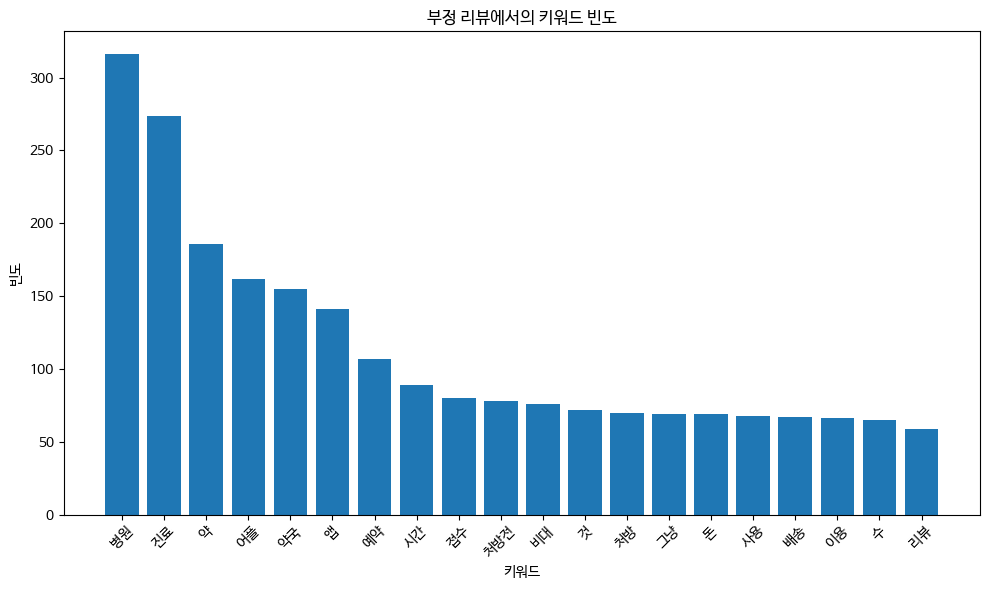

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

#공백 기준으로 잘라주기
word_list = ' '.join(cleaned_reviews0).split()
word_counts = Counter(word_list)

# 가장 많이 등장한 상위 20개 단어 추출
top_keywords = word_counts.most_common(20)

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10, 6))
plt.bar([keyword[0] for keyword in top_keywords], [keyword[1] for keyword in top_keywords])
plt.xlabel('키워드')
plt.ylabel('빈도')
plt.title('부정 리뷰에서의 키워드 빈도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

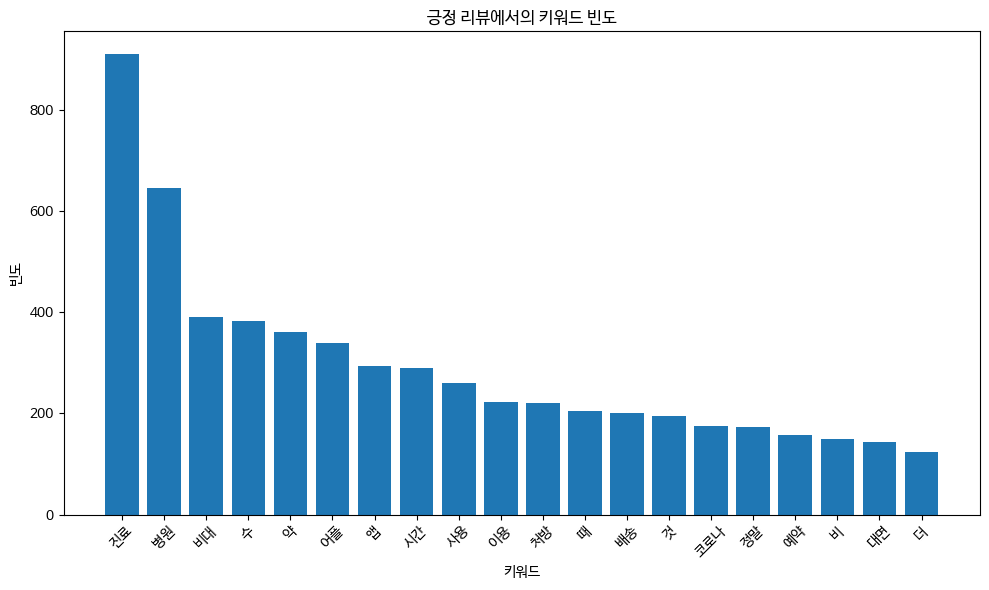

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

#공백 기준으로 잘라주기
word_list = ' '.join(cleaned_reviews1).split()
word_counts = Counter(word_list)

# 가장 많이 등장한 상위 20개 단어 추출
top_keywords = word_counts.most_common(20)

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10, 6))
plt.bar([keyword[0] for keyword in top_keywords], [keyword[1] for keyword in top_keywords])
plt.xlabel('키워드')
plt.ylabel('빈도')
plt.title('긍정 리뷰에서의 키워드 빈도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

가설A. 2020년에 앱 사용 리뷰가 많았을 것이다.

http://www.bosa.co.kr/news/articleView.html?idxno=2167356

코로나 특수로 인한 기사 첨부

In [ ]:
result['datetime_Y']= result['Formatted_Date'].dt.strftime('%Y')
result

,STAR,TITLE,REVIEW,Formatted_Date,label,datetime_Y
0,5,앱 메모장 만들어 주세요,진료기록 볼 수 있어서 너무 좋아요. 따로 관리할 필요 없이 건보랑 연결되어서 편하...,2022-01-16,1,2022
1,5,좋습니다!,진작에 알았다면 좋았을 것을 ㅠㅠ,2021-12-17,1,2021
2,5,마이데이타를 이용한 서비스 메디팡팡!!!!,금융권에서만 사용하는 기술인 줄 알았던 \n마이데이타를 이용해 의료기록을 보여주니 ...,2021-12-17,1,2021
3,5,좋아요,괜찮은 앱같아요,2021-12-17,1,2021
4,5,사용하기 편하네요:),처음 써봤는데 사용하기 편해서 자주 이용할것 같습니다~,2021-12-17,1,2021
...,...,...,...,...,...,...
495,5,편해요,대기 시간도 적고 우선 개인정보를 매번 안적어도 되어서 너무 좋아요,2022-08-16,1,2022
496,5,아즈아주좋음,뚜벅이인 저는 매우 유용하게 잘쓰고있음 현장접수의 치열함을 빠져나와 미리 시간되면 ...,2022-08-16,1,2022
497,5,좋아요,너무 좋아요,2022-08-13,1,2022
498,5,짱 편함,짱 편함,2022-08-10,1,2022


In [ ]:
# 년도별 리뷰 수
year = result['datetime_Y'].value_counts().to_frame()

year = year.reset_index()
year.columns = ['year', 'count']
year

,year,count
0,2023,1028
1,2022,781
2,2021,719
3,2020,51


In [ ]:
import scipy.stats as stats

# 2020년과 다른 연도를 나누기
year_2020 = year[year['year'] == 2020]['count']
other_years = year[year['year'] != 2020]['count']


f_statistic, p_value = stats.f_oneway(year_2020, other_years)

# 결과
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# p-value를 기준으로 유의수준을 설정
alpha = 0.05  # 유의수준 0.05로 설정
if p_value < alpha:
    print("2020년에 앱 사용 리뷰가 다른 해에 비하여 많았을 것이다.")
else:
    print("2020년에 앱 사용 리뷰가 다른 해에 비하여 많지 않았을 것이다.")

F-statistic: nan
p-value: nan
2020년에 앱 사용 리뷰가 다른 해에 비하여 많지 않았을 것이다.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


F-statistic과 p-value가 NaN으로 출력되는 것은 일반적으로 ANOVA를 수행할 때 해당 그룹의 데이터가 충분하지 않을 때 발생했음 , 따라서 히스토그램을 통해 데이터를 확인해보기로 함

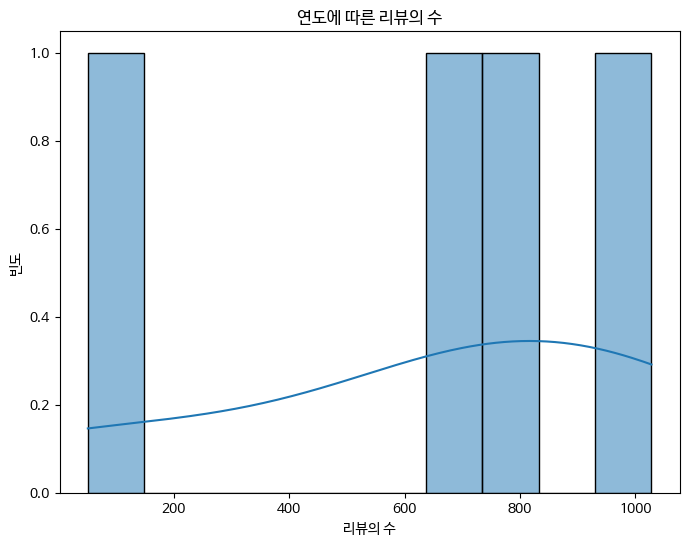

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(8, 6))
sns.histplot(year['count'], bins=10, kde=True)
plt.xlabel('리뷰의 수')
plt.ylabel('빈도')
plt.title('연도에 따른 리뷰의 수')
plt.show()

히스토그램 위에 KDE 곡선을 확인해보니 데이터수가 적고, 데이터의 그룹 간의 차이가 거의 없었음

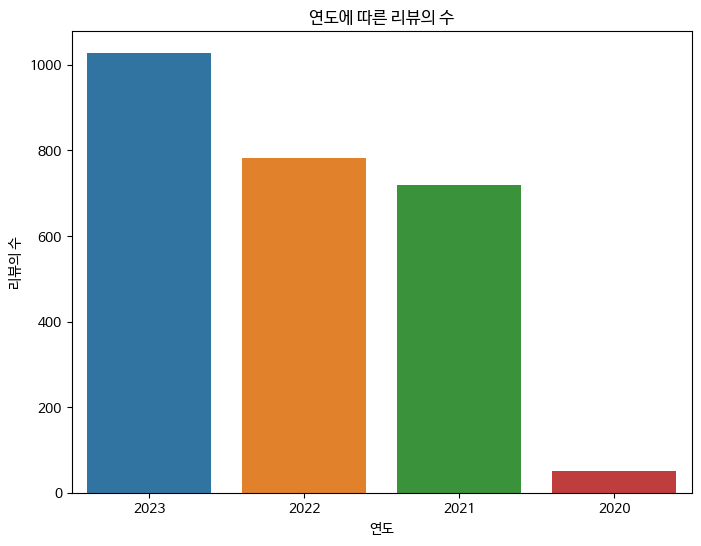

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=year['year'], y=year['count'])
plt.xlabel('연도')
plt.ylabel('리뷰의 수')
plt.title('연도에 따른 리뷰의 수')
plt.show()

개인적인 궁금증1. 2020년의 리뷰 트렌드

2021년의 리뷰 트렌드

2022년의 리뷰 트렌드

2023년의 리뷰 트렌드 확인해보기

In [ ]:
review_2020 = result.loc[result['datetime_Y'] == '2020']
review_2021 = result.loc[result['datetime_Y'] == '2021']
review_2022 = result.loc[result['datetime_Y'] == '2022']
review_2023 = result.loc[result['datetime_Y'] == '2023']

In [ ]:
# KoNLPy의 Okt 형태소 분석기 사용
okt = Okt()

# 불용어 리스트
stopwords = ['을', '를', '이', '가', '은', '는', '들', '고', '하다', '였어요', '있어요','굿닥','올라케어', '메디팡팡', '모비딕', '엠디톡','나만의 닥터',
'닥터온', '똑닥']

# 전처리 함수 정의
def preprocess(review):
    # 한글과 공백을 제외한 모든 문자 제거
    review = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", review)

    # 형태소 분석을 통해 명사만 추출
    nouns = okt.nouns(review)

    # 불용어 제거
    nouns = [word for word in nouns if word not in stopwords]

    # 전처리된 문장 반환
    return ' '.join(nouns)

# 전처리된 리뷰를 저장할 리스트
cleaned_reviews2020 = []

# 긍정 리뷰에 대해 전처리 수행
for review in review_2020['REVIEW']:
    cleaned_review2020 = preprocess(review)
    cleaned_reviews2020.append(cleaned_review2020)

print(cleaned_reviews2020)

['병원 가기 제 족족 방 하라 엠디 톡 전화 해도 그게 뭐 설명 시간', '앱 읶다 는걸 처늠 숙취 해소 알 저 병원 가기 찮는사람', '다운 회원 가입 후 로그인 하니 갑자기 앱 튕기더 그때 앱 것 완전 먹통 이건 뭔가 해결 책좀', '어플 다운 회원 가입 완료 로그인 어플 계속 계속', '최신 버전 계속 튕겨', '어플 자체 요 그 후 처방전 약 하니 제 곳 처방전 약 약국 약 처방 지역 병원', '친구 이야기 혹시 정말 의사 선생님 진단 체크 관련 처방 거리 고민 약 바로 처방 요다음 또 이용 생각 분야 선생님 상담', '의사 선생님 상담 수 추천', '', '', '최근 강남 대형 치과 치료 불만족 리뷰 제 리뷰 어플 문의 고객 센터 문의 발송 이메일 인증 요 창 가입 아이디 자체 이메일 무슨 말 소리 고객 센터 문의 자체 계정 제 친구 도 부탁 모든 계정 창 고객 센터 형식 거 문의 자체 수가 병원 어플 여러분 어플 절대', '피부 박스 보고 좀 더 주문 제품', '샷수 좀 더', '', '스토어 앱 버튼 안눌리', '주말 몸 열 나 주변 영업 병원 약국 정보 덕분 근처 주말 운영 병원 후 몸 사람', '아이폰 스토어 배너 안눌려 낼 이벤트 참여 거', '화이팅 미국 진출', '병원 약국 정보 바로 예약 아주', '진료 시간', '혼자 살 때 병원 찾기 후다닥 예약 치료 서비스', '대부분 광고 좀 병원 소개 좀 점 하나', '주변 병원 약국 이용', '리뷰 예약 듯', '동네 병원 약국 가야 때', '', '도움', '사용', '추석 때 연 병원 확인 지도 때 확인 버튼 팝업 계속 뭐 어쩌 건가 요업 뎃 해도 만 어플 왜 와중 성형 외과 홍보 사람 때 병원 어플 애가 고열 병원 병원 확인 성형 외과 피부 미용 광고 어이 어플 이름 목적', '아기 모기 연고 사려 휴일 약국 검색 후 차 타고 두 군데 문 추석 여 약국 팝업 왜 거 차끌 시간 별 하나 메인 광고 정확도 면서 걸 어플', '병원 예약 건강 정보 코로나 시대 꼭 어플', '매일 아침 메세

In [ ]:
data2020 = {'전처리된 리뷰': cleaned_reviews2020}
df2020 = pd.DataFrame(data2020)

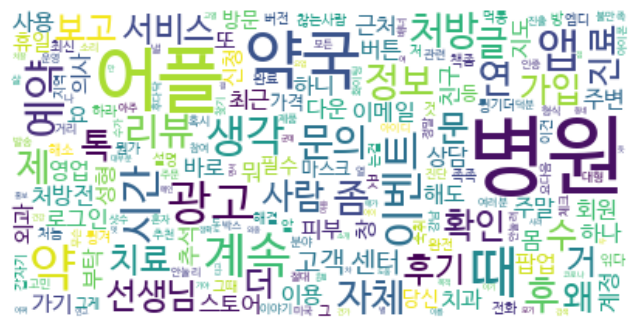

In [ ]:
cleaned_texts2020 = df2020['전처리된 리뷰'].tolist()

# 전처리된 텍스트 데이터를 하나의 문자열로 합치기
text_combined = ' '.join(cleaned_texts2020)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white').generate(text_combined)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

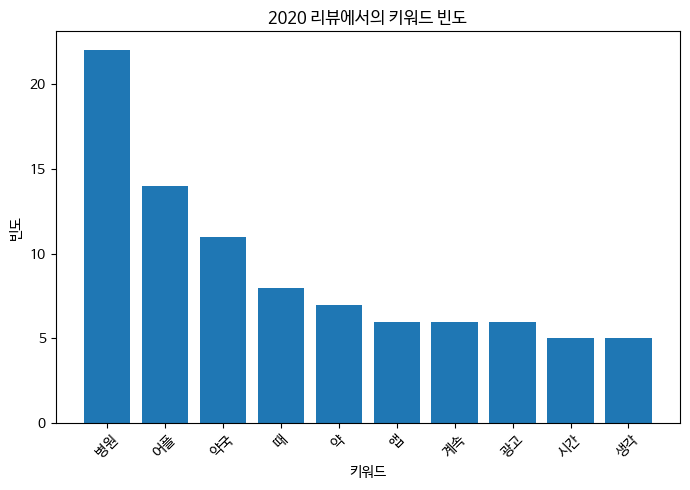

In [ ]:
#공백 기준으로 잘라주기
word_list = ' '.join(cleaned_reviews2020).split()
word_counts = Counter(word_list)

# 가장 많이 등장한 상위 10개 단어 추출
top_keywords = word_counts.most_common(10)

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(7, 5))
plt.bar([keyword[0] for keyword in top_keywords], [keyword[1] for keyword in top_keywords])
plt.xlabel('키워드')
plt.ylabel('빈도')
plt.title('2020 리뷰에서의 키워드 빈도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# KoNLPy의 Okt 형태소 분석기 사용
okt = Okt()

# 불용어 리스트
stopwords = ['을', '를', '이', '가', '은', '는', '들', '고', '하다', '였어요', '있어요','굿닥','올라케어', '메디팡팡', '모비딕', '엠디톡','나만의 닥터',
'닥터온', '똑닥']

# 전처리 함수 정의
def preprocess(review):
    # 한글과 공백을 제외한 모든 문자 제거
    review = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", review)

    # 형태소 분석을 통해 명사만 추출
    nouns = okt.nouns(review)

    # 불용어 제거
    nouns = [word for word in nouns if word not in stopwords]

    # 전처리된 문장 반환
    return ' '.join(nouns)

# 전처리된 리뷰를 저장할 리스트
cleaned_reviews2021 = []

# 긍정 리뷰에 대해 전처리 수행
for review in review_2021['REVIEW']:
    cleaned_review2021 = preprocess(review)
    cleaned_reviews2021.append(cleaned_review2021)

print(cleaned_reviews2021)

['진작 것', '금융 사용 기술 줄 마이 데이타 이용 의료 기록 사용 수 듯 코로나 시대 걸 비대 진료 서비스 위치 기반 이용 주변 병 의원 겸색 가족 인증 통해 가족 보험 청구 서비스 미성년 자녀', '앱', '처음 사용 자주 이용', '사용 수', '내 약 복용 연동 다시 볼 수 장점 생각 예전 생각 못 비 대면 진료 보고 약 처방 수 게 시국 어플 것 직장인 차안 병원 진료 보기 이제야 이해 어플 다행 세상', '요즘 시대 비대 진료 최고 코로나 사실 앱', '앞 이용', '애용', '병원 풀 대해 좀더 향후 확장 한번 기록 관리 수 통합 관리 차원 그 취지 어플 생각 함', '진료 볼때 시간 사람과 접촉 걱정 비 대면 진행', '비 대면 진료기록', '코로나 시국 덕 어플 개발', '내 건강 진료 또 비대 서비스 더욱 믿음', '코로나 시대 병원 마냥 앱', '시간 일해 병원 때 곳 것', '건강 상식 비대 진료', '의료 정보 한번 볼 수 것', '', '한번 의료 관리 비대 진료', '사용 주변 사용', '병원 안 순 꼭 서비스 앱 것', '컬 데이터 한눈', '정보 알', '비대 진료 예약 악 오 개킹 요즘 시국 거만 앱 듯', '한눈', '거', '보기 이용', '내 약 저장', '', '앱 자주', '건강 관련 앱', '앞 더 욥', '요즘 시국 병원 일도 서류 거 일일 병원 발급 필요 앱 하나로 해결 건강 기록 볼 수 의사 선생님 제 상태 더 설명 수 강추', '기존 어플 건강 관리 수 정말 어플', '앱 미리 더 요사', '핑계 건강 기록 서비스 거', '', '어플', '요즘 병원 가기 비 대면 진료 수', '병원 여러 군데 매번 자료 요청 번 볼 수 어플 세상 앞 더 병원', '매우 것', '비대 진료 더욱 확대', '코로나 시대 비대 진료 게다가 내 진료 기록 번 볼 수', '요즘 코로나 때문 병원 기도 비대 진료 건강 기록 확인 수 것', '', '가입 눈 사용 추천', '이용 서비스', '건강 앱완젼 추천', '병원', '전 제 

In [ ]:
data2021 = {'전처리된 리뷰': cleaned_reviews2021}
df2021 = pd.DataFrame(data2021)

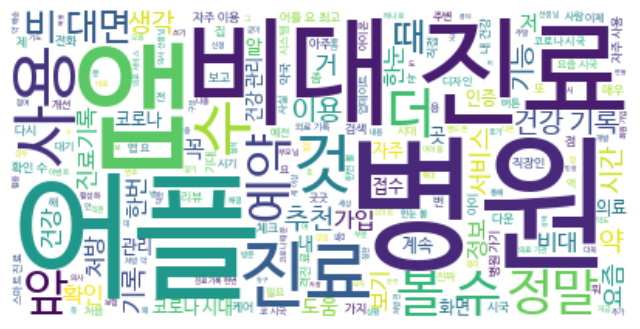

In [ ]:
cleaned_texts2021 = df2021['전처리된 리뷰'].tolist()

# 전처리된 텍스트 데이터를 하나의 문자열로 합치기
text_combined = ' '.join(cleaned_texts2021)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white').generate(text_combined)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

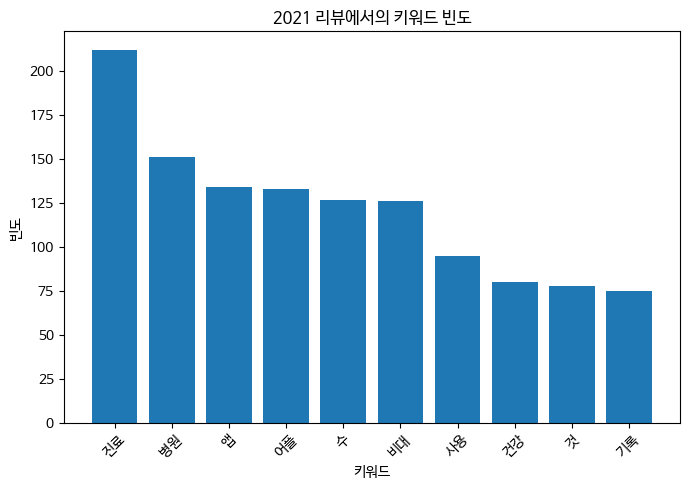

In [ ]:
#공백 기준으로 잘라주기
word_list = ' '.join(cleaned_reviews2021).split()
word_counts = Counter(word_list)

# 가장 많이 등장한 상위 10개 단어 추출
top_keywords = word_counts.most_common(10)

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(7, 5))
plt.bar([keyword[0] for keyword in top_keywords], [keyword[1] for keyword in top_keywords])
plt.xlabel('키워드')
plt.ylabel('빈도')
plt.title('2021 리뷰에서의 키워드 빈도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# KoNLPy의 Okt 형태소 분석기 사용
okt = Okt()

# 불용어 리스트
stopwords = ['을', '를', '이', '가', '은', '는', '들', '고', '하다', '였어요', '있어요','굿닥','올라케어', '메디팡팡', '모비딕', '엠디톡','나만의 닥터',
'닥터온', '똑닥']

# 전처리 함수 정의
def preprocess(review):
    # 한글과 공백을 제외한 모든 문자 제거
    review = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", review)

    # 형태소 분석을 통해 명사만 추출
    nouns = okt.nouns(review)

    # 불용어 제거
    nouns = [word for word in nouns if word not in stopwords]

    # 전처리된 문장 반환
    return ' '.join(nouns)

# 전처리된 리뷰를 저장할 리스트
cleaned_reviews2022 = []

# 긍정 리뷰에 대해 전처리 수행
for review in review_2022['REVIEW']:
    cleaned_review2022 = preprocess(review)
    cleaned_reviews2022.append(cleaned_review2022)

print(cleaned_reviews2022)

['진료기록 볼 수 관리 필요 건 보랑 연결 진료 상세 역 알 수 해당 진료 기록 개인 진료 적 수 메모장 활성화 더 거 개발자 부분 고려', '', '평소 앱 잘만 앱 애플 계정 카카오 계정', '배송 시스템', '원격 진료 디자인 별로', '뭔가 타 비대 진료 앱 비교 때 진정 의사 매칭 상세 상담 좀 미숙 부분 곧 업뎃되리 자주 애용', '비대 진료 처방전 약국 처방전 제조 약 약 처방 여러 약국 연락 처방전 약 대체 약 기재 진료 진료 약 처방 못 약국 계속 뭐 당장 약 신청 병 더', '예약', '병원 시간 직장인 꼭 앱', '의사 선생님 바로 깜짝 약도 바로 저 사람 쪼끔 시간 듯', '약 앱 예상 시간 기능', '영통 의사 선생님 바로 채팅 진료 더', '여드름 약 처방 어플 발견 진짜 진짜 약도 퀵 앞 자주', '처방전 분만 퇴근 못', '근처 병원 과잉 진료 심해 화상통화 후 자동 결제 비 대면 앱 통한 건 불법 라며 병원 직접 팩스 약 진료 약 시간 소모 아이디어 개선', '나우 케어 후기 안 이건 임', '처방전 약국 곳 잡상인 취급 제휴 약국 그냥 팩스 번호 오픈 하나요', '친구 양성 친구 다른 비대 진료 앱', '항원 검사 가격 비교', '일단 바로 매칭 매칭 거 약국 못 응급실 감전 모든 약국 비대 진단 안 것 때문 돈 시간 생각 열 진단 약국 팩스 앱 오류', '자가 격리 때문 퀵 무료', '택배 비 원퀵비 진료 비도 방문 근처 약국 처방전 해도 근처 약국 전부 굿닥안쓴다 택배 비 퀵비 거 근처 약국 어플 끝 집 근처 약국 퀵 택배 둘 중 선택 돈 그냥 돈 잃어버럈다 생각 진료 비만 약 어플', '밀레니엄 시대 때 버퍼링 수준', '앱 홈 화면 사용 듯', '항원 검사 이용 함 병원 목록 항원 검사 병원 알 수', '지하철 역 장난 합 심지어 말 전화 보 드릴 여 끝 누구 코로나 처음 설명 약 가요 병원 검사 후 처방 공신 캐 물어 겨우 느낌 의사 마다 왜 비대 진료 처 의 산지 안해', '제일', '별 병 민폐 못 병원 전화 굿닥

In [ ]:
data2022 = {'전처리된 리뷰': cleaned_reviews2022}
df2022 = pd.DataFrame(data2022)

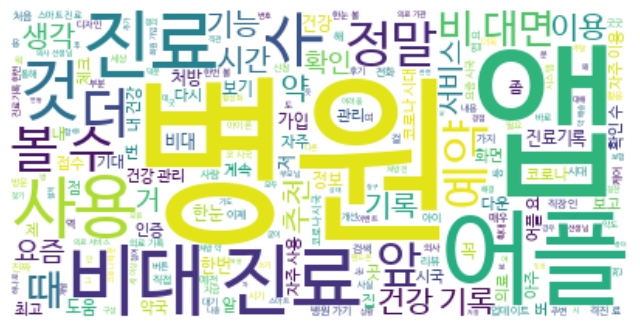

In [ ]:
cleaned_texts2022 = df2022['전처리된 리뷰'].tolist()

# 전처리된 텍스트 데이터를 하나의 문자열로 합치기
text_combined = ' '.join(cleaned_texts2021)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white').generate(text_combined)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

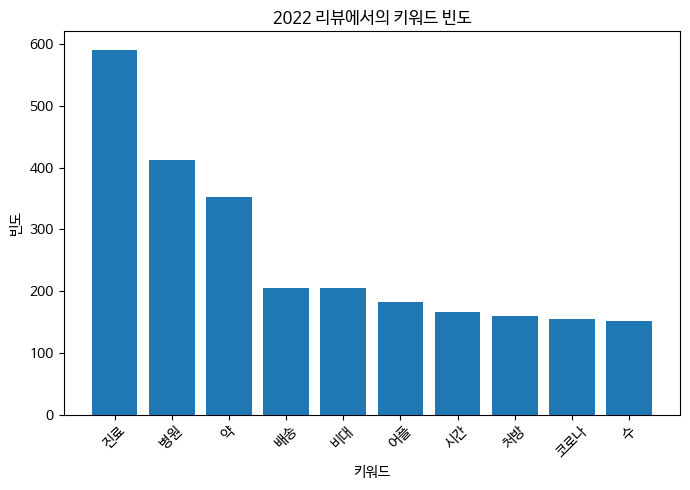

In [ ]:
#공백 기준으로 잘라주기
word_list = ' '.join(cleaned_reviews2022).split()
word_counts = Counter(word_list)

# 가장 많이 등장한 상위 10개 단어 추출
top_keywords = word_counts.most_common(10)

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(7, 5))
plt.bar([keyword[0] for keyword in top_keywords], [keyword[1] for keyword in top_keywords])
plt.xlabel('키워드')
plt.ylabel('빈도')
plt.title('2022 리뷰에서의 키워드 빈도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# KoNLPy의 Okt 형태소 분석기 사용
okt = Okt()

# 불용어 리스트
stopwords = ['을', '를', '이', '가', '은', '는', '들', '고', '하다', '였어요', '있어요','굿닥','올라케어', '메디팡팡', '모비딕', '엠디톡','나만의 닥터',
'닥터온', '똑닥']

# 전처리 함수 정의
def preprocess(review):
    # 한글과 공백을 제외한 모든 문자 제거
    review = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", review)

    # 형태소 분석을 통해 명사만 추출
    nouns = okt.nouns(review)

    # 불용어 제거
    nouns = [word for word in nouns if word not in stopwords]

    # 전처리된 문장 반환
    return ' '.join(nouns)

# 전처리된 리뷰를 저장할 리스트
cleaned_reviews2023 = []

# 긍정 리뷰에 대해 전처리 수행
for review in review_2023['REVIEW']:
    cleaned_review2023 = preprocess(review)
    cleaned_reviews2023.append(cleaned_review2023)

print(cleaned_reviews2023)

['진료 원장 글 정말 도움', '격진 료 최고 진짜 병원 타 일주일 뒤 약 또 오라 것 나 나 약 더 나 나 고민 때 집 그냥 격진 료 세상 제일 친구 모비 닥 앱 병원 더 동네 사용 수 진짜 번 정말', '병원 전화 연결 이건 진료 시간 진료 한눈 확인 필요 간호사 저 서로 것', '병원 마냥 진료 단순 앱 정말 도움 기능 보 감동 앞 더 기능 기대 앱 요', '생각 정보 바로 확인가능 무엇 가족 등록 접수 예약 격진 료 진짜 말 모해 진짜 최고 단점 굳이 굳이 꼽자 병원 더 정도', '아이 정말 활용 홈페이지 운영 시간 확인 것 정돈 기분', '요즘 날 격진 료 진료 병원 년 중 원장 영통 계속 이용 생각', '진료 확인 제 병원 원장 진료 시간 변동 헛걸음 종종 모비 닥 일 앞 이용', '사용 사용자 아이 병원 예약 필수 늘 소아과 모비닥 사용 격진 료 정말 굿 모두', '양질 글 볼 수 의사 직접 작성 피드 저 도움', '병원 접수 항상 대기 시간 낭비 예약 대기 병원 서도 큐알 접수 바로 접수 간호사 직접 얘기 서로', '건강피드 아이 건강 대한 글 하리 안 저 도움 글', '직장인 저 아주 어플', '소아과 진짜 대기 진료 것 초진 이후 격진 료 차도 볼 땐 그냥 비 대면 진료', '어플 이용 가족 등록 사용 저 제일 부모님 병원 모시 때 사용', '헛걸음 안해 피드 내용 마음 듭니', '리뷰 정말 기능 예약 접수 예약 날짜 것 개꿀 격진 료 다음 기회 사용 예정', '전화 예약 것 저 병원 날짜 시간 조회 예약 수 변경 취소', '항상 대기 병원 대기 안해', '애기 엄마 사이 핫 맘 카페 보고 설치 우리동네 엄마 애 약 차도 볼 때 영상통화 격진 료 원장 모비 닥 무조건', '고열 병원 힘 가족 예약 시간 대기 진료 앞 서비스', '격진 료 진짜 진짜', '시간표 보고 예약 예약 날', '아이 데리 병원 가기 격진 료 진짜 세상 정말 번 보고 이용', '병원 진료 살 볼일 요', '진료 시간 휴무 일 바로 확인 수 예약 잡기 예약 일 변경 것 

In [ ]:
data2023 = {'전처리된 리뷰': cleaned_reviews2023}
df2023 = pd.DataFrame(data2023)

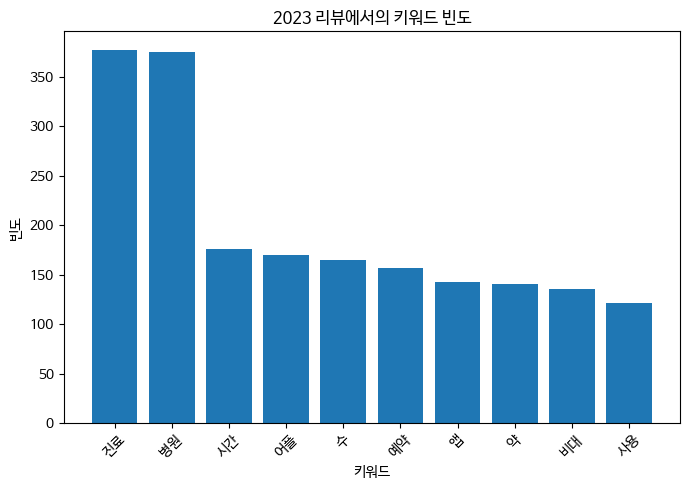

In [ ]:
#공백 기준으로 잘라주기
word_list = ' '.join(cleaned_reviews2023).split()
word_counts = Counter(word_list)

# 가장 많이 등장한 상위 10개 단어 추출
top_keywords = word_counts.most_common(10)

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(7, 5))
plt.bar([keyword[0] for keyword in top_keywords], [keyword[1] for keyword in top_keywords])
plt.xlabel('키워드')
plt.ylabel('빈도')
plt.title('2023 리뷰에서의 키워드 빈도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

가설B. 12월에 앱 사용 리뷰가 많았을 것이다. - 리뷰 수를 월별로 나누고 평균 리뷰 수 차이 확인하기

In [ ]:
result['datetime_m']= result['Formatted_Date'].dt.strftime('%m')
result

,STAR,TITLE,REVIEW,Formatted_Date,label,datetime_Y,datetime_m
0,5,앱 메모장 만들어 주세요,진료기록 볼 수 있어서 너무 좋아요. 따로 관리할 필요 없이 건보랑 연결되어서 편하...,2022-01-16,1,2022,01
1,5,좋습니다!,진작에 알았다면 좋았을 것을 ㅠㅠ,2021-12-17,1,2021,12
2,5,마이데이타를 이용한 서비스 메디팡팡!!!!,금융권에서만 사용하는 기술인 줄 알았던 \n마이데이타를 이용해 의료기록을 보여주니 ...,2021-12-17,1,2021,12
3,5,좋아요,괜찮은 앱같아요,2021-12-17,1,2021,12
4,5,사용하기 편하네요:),처음 써봤는데 사용하기 편해서 자주 이용할것 같습니다~,2021-12-17,1,2021,12
...,...,...,...,...,...,...,...
495,5,편해요,대기 시간도 적고 우선 개인정보를 매번 안적어도 되어서 너무 좋아요,2022-08-16,1,2022,08
496,5,아즈아주좋음,뚜벅이인 저는 매우 유용하게 잘쓰고있음 현장접수의 치열함을 빠져나와 미리 시간되면 ...,2022-08-16,1,2022,08
497,5,좋아요,너무 좋아요,2022-08-13,1,2022,08
498,5,짱 편함,짱 편함,2022-08-10,1,2022,08


월별 평균 리뷰 수: 214.91666666666666
월별 리뷰 수:datetime_m
01    122
02    164
03    281
04    151
05    342
06    183
07    121
08    215
09    124
10    164
11    110
12    602
dtype: int64


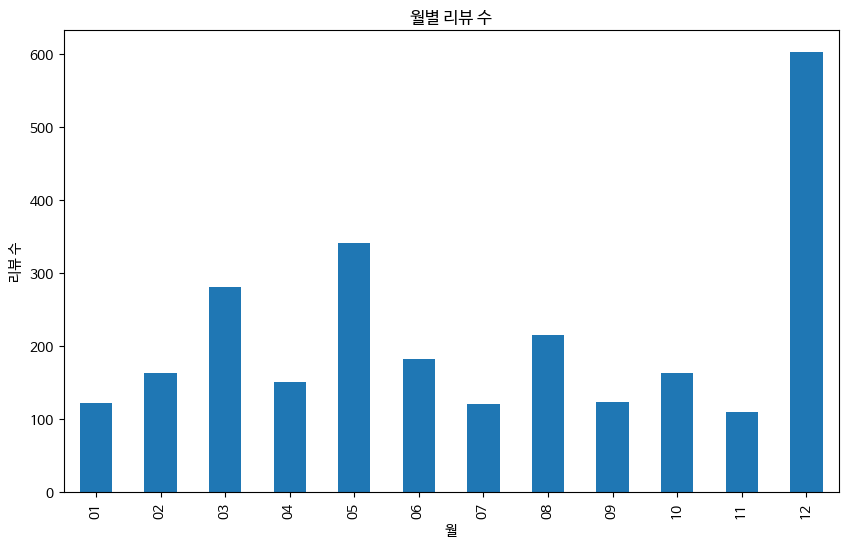

In [ ]:
#월별 리뷰 수 계산
review_counts = result.groupby('datetime_m').size()

#월별 평균 리뷰 수 계산
av_m_reviews = review_counts.mean()

#월별 리뷰 수 시각화
review_counts.plot(kind='bar', figsize=(10, 6), xlabel='월', ylabel='리뷰 수', title='월별 리뷰 수')

#결과 출력
print(f'월별 평균 리뷰 수: {av_m_reviews}')
print(f'월별 리뷰 수:{review_counts}')

가설C. 불만 리뷰를 남기는 사람들은 리뷰를 길게 쓸 것이다. - Pearson 상관 계수 확인

In [ ]:
result['length']=result['REVIEW'].apply(lambda x: len(x))
result

,STAR,TITLE,REVIEW,Formatted_Date,label,datetime_Y,datetime_m,length
0,5,앱 메모장 만들어 주세요,진료기록 볼 수 있어서 너무 좋아요. 따로 관리할 필요 없이 건보랑 연결되어서 편하...,2022-01-16,1,2022,01,153
1,5,좋습니다!,진작에 알았다면 좋았을 것을 ㅠㅠ,2021-12-17,1,2021,12,18
2,5,마이데이타를 이용한 서비스 메디팡팡!!!!,금융권에서만 사용하는 기술인 줄 알았던 \n마이데이타를 이용해 의료기록을 보여주니 ...,2021-12-17,1,2021,12,178
3,5,좋아요,괜찮은 앱같아요,2021-12-17,1,2021,12,8
4,5,사용하기 편하네요:),처음 써봤는데 사용하기 편해서 자주 이용할것 같습니다~,2021-12-17,1,2021,12,30
...,...,...,...,...,...,...,...,...
495,5,편해요,대기 시간도 적고 우선 개인정보를 매번 안적어도 되어서 너무 좋아요,2022-08-16,1,2022,08,37
496,5,아즈아주좋음,뚜벅이인 저는 매우 유용하게 잘쓰고있음 현장접수의 치열함을 빠져나와 미리 시간되면 ...,2022-08-16,1,2022,08,54
497,5,좋아요,너무 좋아요,2022-08-13,1,2022,08,6
498,5,짱 편함,짱 편함,2022-08-10,1,2022,08,4


In [ ]:
pearson_corr = result['length'].corr(result['label'], method='pearson')

pearson_corr

-0.32310628713906975

 음의 상관을 가지는 것을 확인할 수 있음

<ipython-input-140-025d4b547c80>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = result.corr()


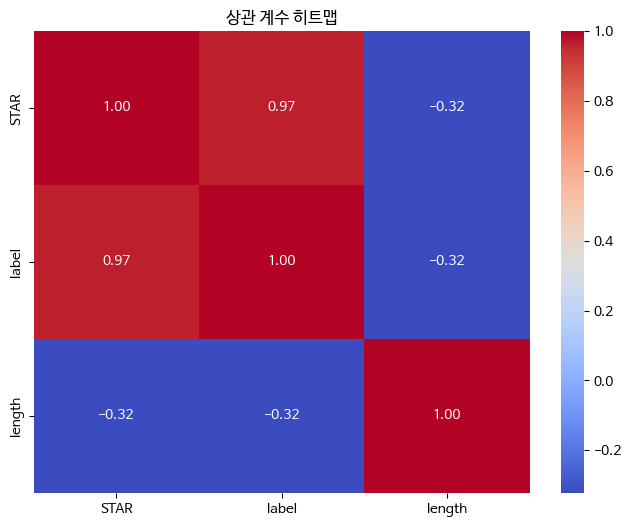

In [ ]:
#데이터프레임의 피어슨 상관 계수 행렬 계산
correlation_matrix = result.corr()

#상관 계수 행렬을 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관 계수 히트맵')
plt.show()